In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

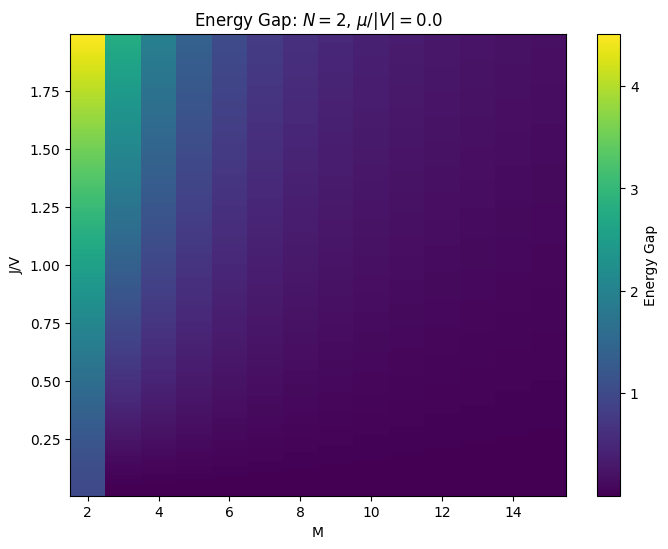

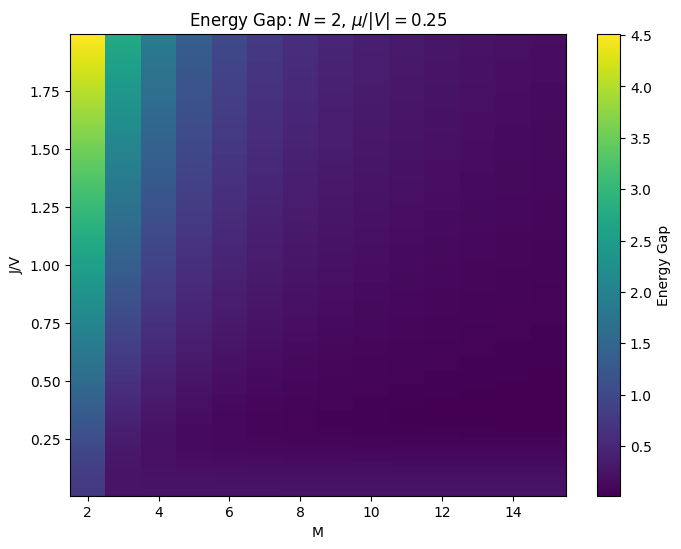

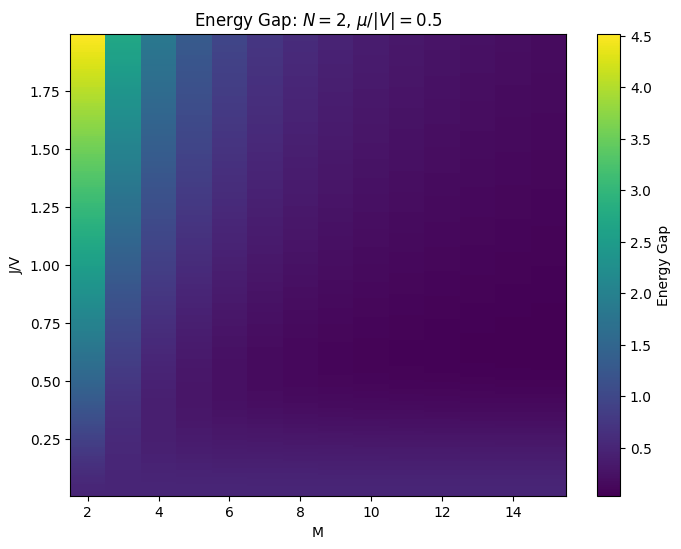

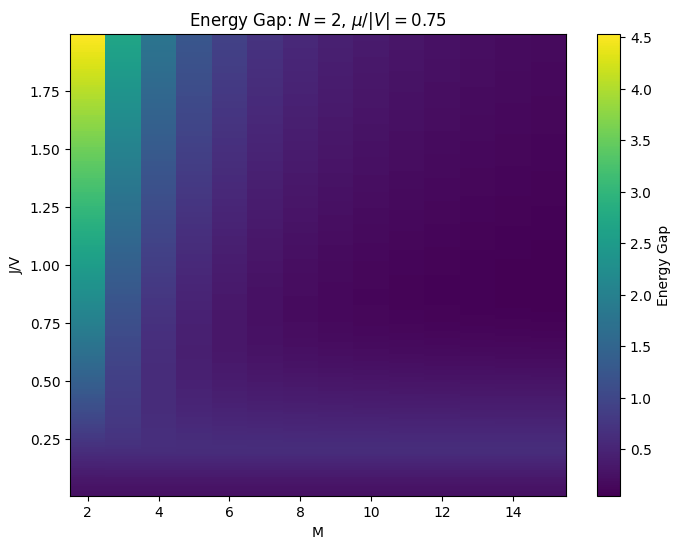

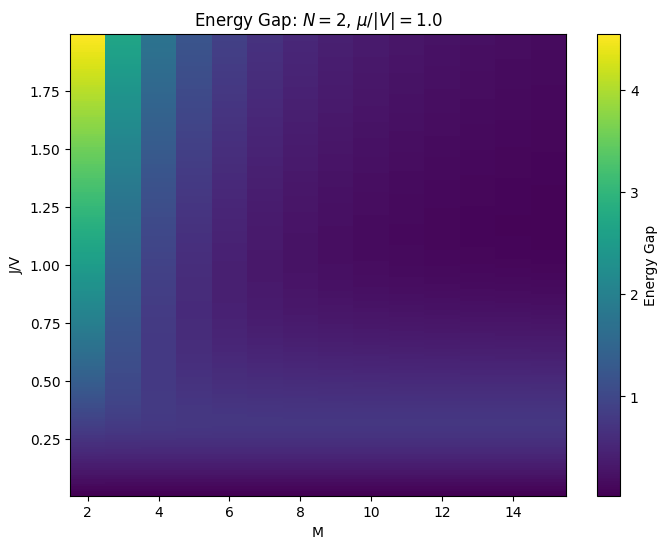

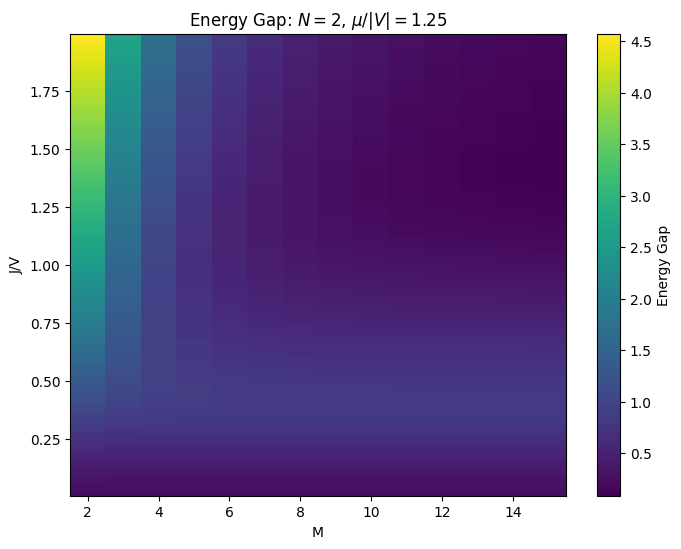

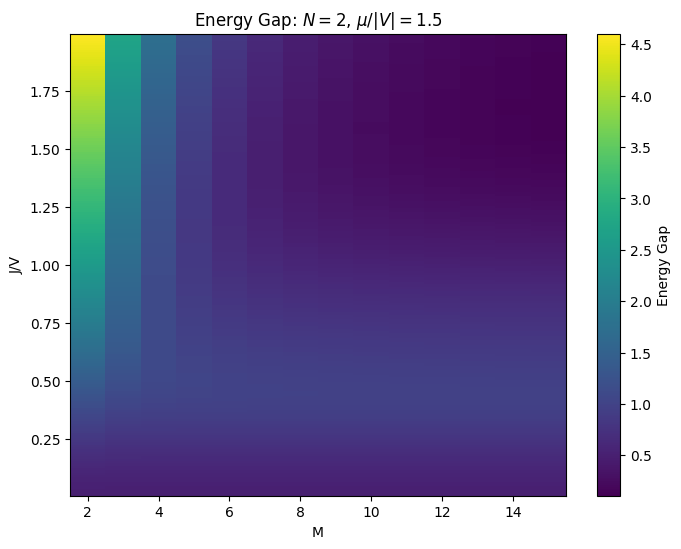

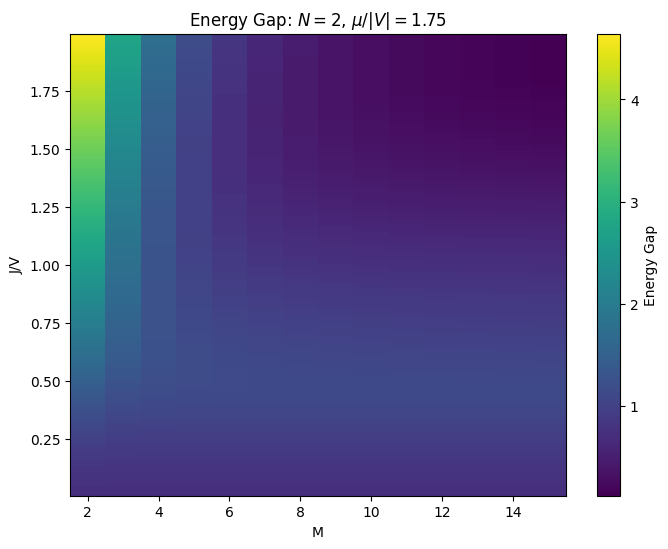

In [39]:
N = 2
Ms = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
V = -1
J_V_ratios = np.arange(0.01, 2, 0.01)
mu_V_ratios = np.arange(0,2,0.25)
energy_gap = np.zeros((len(J_V_ratios), len(Ms)))
mu_V_ratio = 1
for mu_V_ratio in mu_V_ratios:
    
    for i, M in enumerate(Ms):
        for j, J_V_ratio in enumerate(J_V_ratios):
            hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio=mu_V_ratio, J_V_ratio=J_V_ratio)
            energies, _ = exact_diagonalize(hamiltonian)
            energy_gap[j, i] = energies[1] - energies[0]
    
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(Ms, J_V_ratios, energy_gap, shading='auto', cmap='viridis')
    plt.colorbar(label='Energy Gap')
    plt.xlabel('M')
    plt.ylabel('J/V')
    plt.title(f'Energy Gap: $N={N}$, $\mu/|V|={mu_V_ratio}$')
    plt.show()
